<a href="https://colab.research.google.com/github/Fozan-webdev/tempratureanalyser/blob/main/tempratureanalyser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
subhamjain_temperature_of_all_countries_19952020_path = kagglehub.dataset_download('subhamjain/temperature-of-all-countries-19952020')

print('Data source import complete.')


Data source import complete.


In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import seaborn as sns;# Used for series plotting
import datetime as dt;#used for Date, Month and Year column
import matplotlib.pyplot as plt;# Used for every plot, label and other graphical features
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/temperature-of-all-countries-19952020/city_temperature.csv


In [10]:
df=pd.read_csv('/content/city_temperature.csv')
df.shape

(128803, 8)

In [11]:
#Getting First five rows of datasheet
df_first_5=df.head(5)

#Getting last 10 rows of datasheet
df_last_10=df.tail(10)

#Concatination (making one dataframe) of first 5 and last 10 rows of datasheet
df1=pd.concat([df_first_5,df_last_10])
df1

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1.0,1.0,1995.0,64.2
1,Africa,Algeria,NaN,Algiers,1.0,2.0,1995.0,49.4
2,Africa,Algeria,NaN,Algiers,1.0,3.0,1995.0,48.8
3,Africa,Algeria,NaN,Algiers,1.0,4.0,1995.0,46.4
4,Africa,Algeria,NaN,Algiers,1.0,5.0,1995.0,47.9
128793,Africa,Madagascar,NaN,Antananarivo,3.0,25.0,2010.0,68.8
128794,Africa,Madagascar,NaN,Antananarivo,3.0,26.0,2010.0,69.4
128795,Africa,Madagascar,NaN,Antananarivo,3.0,27.0,2010.0,71.4
128796,Africa,Madagascar,NaN,Antananarivo,3.0,28.0,2010.0,72.6
128797,Africa,Madagascar,NaN,Antananarivo,3.0,29.0,2010.0,72.3


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128803 entries, 0 to 128802
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Region          128803 non-null  object 
 1   Country         128803 non-null  object 
 2   State           0 non-null       float64
 3   City            128803 non-null  object 
 4   Month           128802 non-null  float64
 5   Day             128802 non-null  float64
 6   Year            128802 non-null  float64
 7   AvgTemperature  128802 non-null  float64
dtypes: float64(5), object(3)
memory usage: 7.9+ MB


In [13]:
#Getting numerical value columns
column=["Month","Day","Year","AvgTemperature"]

#Getting maximum and minimum values of numerical columns
Maximum_values=df[column].max()
Minimum_values=df[column].min()

#Creating DataFrame of maximum and minimum values
Max_min_values=pd.DataFrame({"Max":Maximum_values,
                            "Min":Minimum_values})
Max_min_values

,Max,Min
Month,12.0,1.0
Day,31.0,0.0
Year,2020.0,201.0
AvgTemperature,100.2,-99.0


In [14]:
df.isnull().sum()

,0
Region,0
Country,0
State,128803
City,0
Month,1
Day,1
Year,1
AvgTemperature,1


<Axes: xlabel='Column', ylabel='Count'>

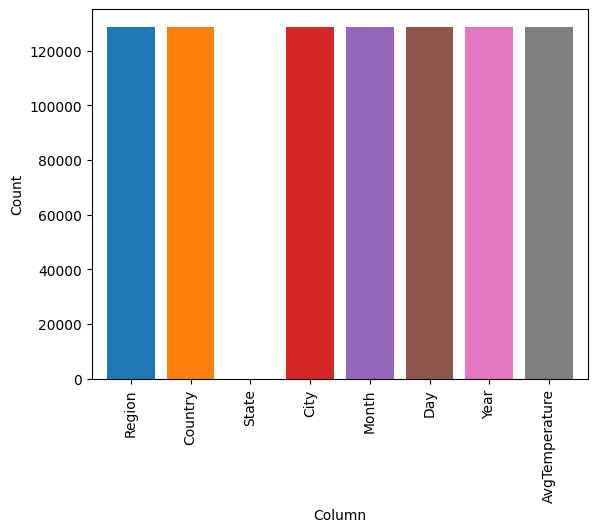

In [15]:
df.count().plot.bar(ylabel="Count",xlabel="Column",width=0.8,color=sns.color_palette())

In [16]:
#Getting Mean, Standard deviation and Median values of numerical columns
Mean_values=df[column].mean()
Std_values=df[column].std()
Median_values=df[column].median()

#Creating Database of numerical attribute's mean, median and standard deviation using values we got above
Numerical_attr=pd.DataFrame({"Mean":Mean_values,
                            "Std":Std_values,
                            "Median":Median_values}).transpose()
Numerical_attr

,Month,Day,Year,AvgTemperature
Mean,6.467920,15.717349,2005.913891,51.454435
Std,3.459035,8.801271,39.005685,59.247953
Median,6.000000,16.000000,2006.000000,76.100000


<Axes: >

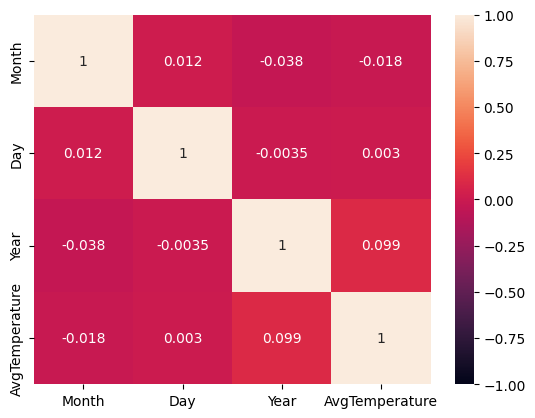

In [17]:
# Heatmap correlation between all numerical column
sns.heatmap(df[column].corr(),vmin=-1,vmax=1,annot=True)

In [18]:
df=df.drop("State",axis=1)
df

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Algiers,1.0,1.0,1995.0,64.2
1,Africa,Algeria,Algiers,1.0,2.0,1995.0,49.4
2,Africa,Algeria,Algiers,1.0,3.0,1995.0,48.8
3,Africa,Algeria,Algiers,1.0,4.0,1995.0,46.4
4,Africa,Algeria,Algiers,1.0,5.0,1995.0,47.9
...,...,...,...,...,...,...,...
128798,Africa,Madagascar,Antananarivo,3.0,30.0,2010.0,71.1
128799,Africa,Madagascar,Antananarivo,3.0,31.0,2010.0,70.6
128800,Africa,Madagascar,Antananarivo,4.0,1.0,2010.0,68.9
128801,Africa,Madagascar,Antananarivo,4.0,2.0,2010.0,69.8


In [19]:
Country_Avg_Temp_65=df.loc[( df["Year"]>2019) & (df["AvgTemperature"]==65),["Country","AvgTemperature"]]
Country_Avg_Temp_65=pd.DataFrame(Country_Avg_Temp_65)
Country_Avg_Temp_65.reset_index(drop=True)

,Country,AvgTemperature
0,Egypt,65.0
1,Ethiopia,65.0


In [20]:
AvgTemp_Top_10=df.nlargest(10,"AvgTemperature",keep="last")[["Country","AvgTemperature"]]
AvgTemp_Top_10.reset_index(drop=True)

,Country,AvgTemperature
0,Egypt,100.2
1,Guinea-Bissau,100.1
2,Egypt,98.9
3,Egypt,98.5
4,Egypt,98.4
5,Egypt,98.3
6,Egypt,97.9
7,Egypt,97.8
8,Egypt,97.8
9,Morocco,97.0


[Text(0, 0, '98.475'), Text(0, 0, '100.1'), Text(0, 0, '97')]

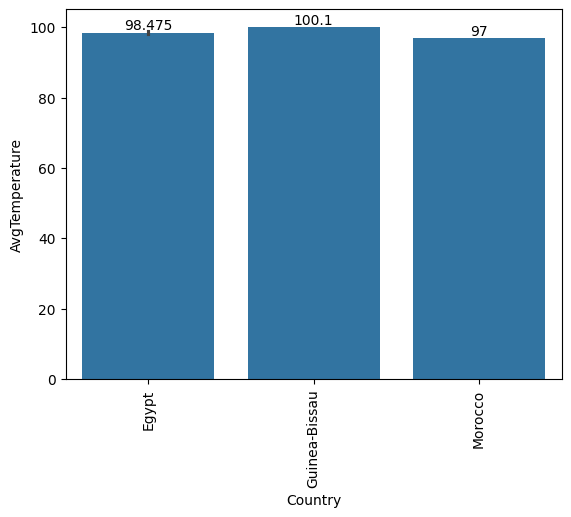

In [21]:
plot=sns.barplot(data=AvgTemp_Top_10,x="Country",y="AvgTemperature")
plt.xticks(rotation=90)
plot.bar_label(plot.containers[0])

Text(0.5, 1.0, 'All Countries with no of times avg temp=75')

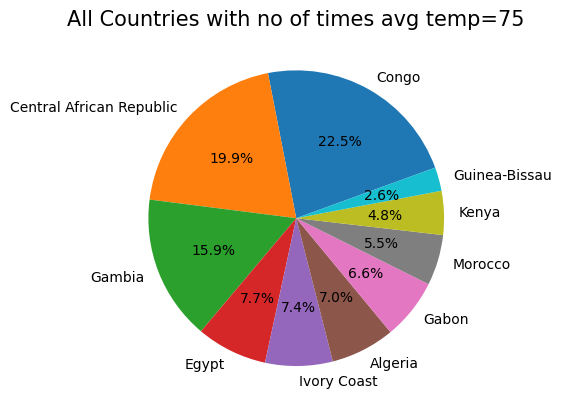

In [22]:
#Getting list of Country whose  Average temperature = 75
Country_Avg_Temp_75=df.loc[(df["AvgTemperature"]==75),["Country","AvgTemperature"]]

#Getting How many times it of every country's average temperature = 75
Country_Count={}
for i in Country_Avg_Temp_75["Country"].unique():
    Country_Count.update({i:Country_Avg_Temp_75.loc[Country_Avg_Temp_75["Country"]==i,"Country"].count()})
Country_Count=pd.DataFrame({"Country":Country_Count.keys(),
                           "Count":Country_Count.values()})

#Getting top 10 countrieswhose 75 temperature count is high
Country_Count_10=Country_Count.nlargest(10,"Count")

#Plot the pie
plt.pie(data=Country_Count_10,x=Country_Count_10["Count"],labels=Country_Count_10["Country"],textprops={'fontsize': 10},autopct='%1.1f%%',startangle=20)
plt.title("All Countries with no of times avg temp=75",fontdict={'size':15})

<Axes: xlabel='AvgTemperature', ylabel='Count'>

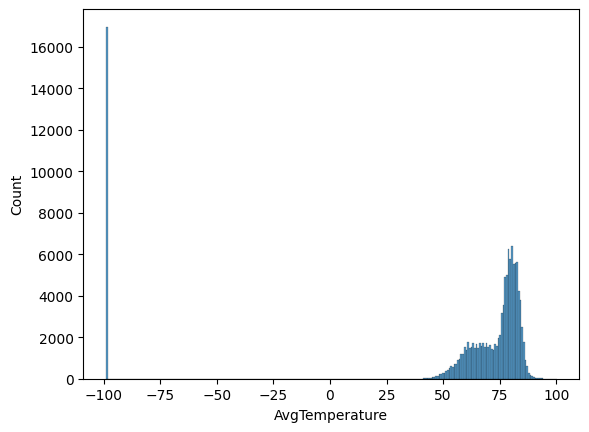

In [23]:
sns.histplot(df["AvgTemperature"])

In [24]:
#Getting values of Countries where average temperature reached below 0
Country_Temp_small_0=df.loc[(df["AvgTemperature"]<0),["Country","AvgTemperature"]].reset_index(drop=True)

#Getting distinct values of Country and Average Temperature and printing the count and the dataframe we got
distinct_country=list(Country_Temp_small_0["Country"].unique())
distinct_AvgTemp=list(Country_Temp_small_0["AvgTemperature"].unique())
print('Country:',len(distinct_country))
print('Average Temperature:',len(distinct_AvgTemp))
Country_Temp_small_0

Country: 15
Average Temperature: 1


,Country,AvgTemperature
0,Algeria,-99.0
1,Algeria,-99.0
2,Algeria,-99.0
3,Algeria,-99.0
4,Algeria,-99.0
...,...,...
16966,Madagascar,-99.0
16967,Madagascar,-99.0
16968,Madagascar,-99.0
16969,Madagascar,-99.0


In [25]:
Day_AvgTemp_Egypt=df.loc[(df["Country"]=="Egypt")&(df["Month"]==7)&(df["Year"]==2019),["Day","AvgTemperature"]].reset_index(drop=True)
Day_AvgTemp_Egypt

,Day,AvgTemperature
0,1.0,86.4
1,2.0,88.0
2,3.0,87.2
3,4.0,85.2
4,5.0,84.0
5,6.0,86.3
6,7.0,86.5
7,8.0,86.6
8,9.0,88.0
9,10.0,87.1


<Axes: xlabel='Day', ylabel='AvgTemperature'>

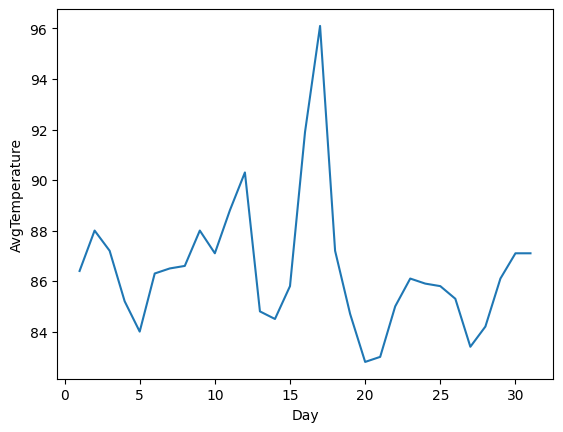

In [26]:
sns.lineplot(x=Day_AvgTemp_Egypt["Day"],y=Day_AvgTemp_Egypt["AvgTemperature"])

In [27]:
Month_AvgTemp_Algeria=df.loc[(df["Country"]=="Algeria")&(df["Year"]==2017),["Month","AvgTemperature"]].reset_index(drop=True)
Month_AvgTemp_Algeria

,Month,AvgTemperature
0,1.0,48.1
1,1.0,46.7
2,1.0,48.0
3,1.0,50.6
4,1.0,55.8
...,...,...
360,12.0,57.6
361,12.0,57.5
362,12.0,59.5
363,12.0,57.0


<ipython-input-28-4ad2836a3dbf>:1: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  plot=sns.barplot(x=Month_AvgTemp_Algeria["Month"],y=Month_AvgTemp_Algeria["AvgTemperature"],errwidth=0)


[Text(0, 0, '49.6774'),
 Text(0, 0, '56.4214'),
 Text(0, 0, '57.8032'),
 Text(0, 0, '60.75'),
 Text(0, 0, '67.8258'),
 Text(0, 0, '75.97'),
 Text(0, 0, '80.4581'),
 Text(0, 0, '82.5516'),
 Text(0, 0, '74.09'),
 Text(0, 0, '65.6968'),
 Text(0, 0, '56.4767'),
 Text(0, 0, '51.6355')]

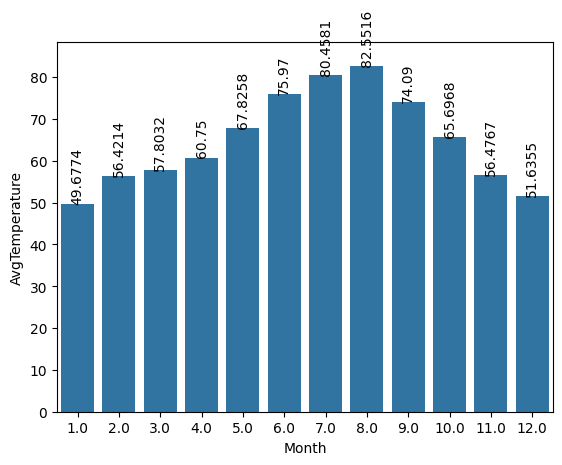

In [28]:
plot=sns.barplot(x=Month_AvgTemp_Algeria["Month"],y=Month_AvgTemp_Algeria["AvgTemperature"],errwidth=0)
plot.bar_label(plot.containers[0],rotation=90)